### Why Principal Componenet Analysis(PCA)?
PCA ( Principal Component Analysis ) helps in producing low dimensional representation of the dataset by identifying a set of linear combination of features which have maximum variance and are mutually un-correlated. This linear dimensionality technique could be helpful in understanding latent interaction between the variable in an unsupervised setting.

In [1]:
#### Popular Example of PCA -  Using PCA on the iris dataset.
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [2]:
# Firstly we are standardizing the data. By using the sklearn preprocessing methodology
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

# Why ScalarStandardScaler ?  Because it helps to standardize the dataset’s features onto unit scale.
# By unit scale we should understand that (mean = 0 and variance = 1).

In [4]:
## Reducing the Projection of the datasets.  Lets write the script first:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)      # Reducing the dimensions from original four to two.
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

#  After dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component.
# That is why we are just giving the columns new names.

In [5]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)


[ Below points are taken from this post](https://galaxydatatech.com/2018/07/12/principal-component-analysis/)

### How Principal Component Analysis Works
Principal component analysis creates a new set of features from the old set of features. The new set of features has the following properties;

* The new set of features have zero correlation between the features.
* The new set of features are linear combination of the old features.
* The axes of these new features are called the principal components.
* The first principal component has the largest variance followed by the second principal component and so on.
* The principal components are orthogonal.
* The variance in principal components decreases from the first principal component to the last one.

When creating new set of features from the old features we compute the variance of the features and select the features that yield the highest variance. This forms the first principal component. This process continues as we go to the second, third and more principal components.There are various approaches that we can use to come up with principal components.
Below is a summary of the approaches of finding the principal components;

* Maximizing the variance
* Maximizing the reconstruction error
* Eigen-decomposition.
* Singular Value Decomposition.



### Below are simple steps on implementing the PCA.

* Data standardization.
* Computing the covariance matrix.
* Computing the Eigenvectors and Eigenvectors for the covariance matrix.
* Selecting the components starting with largest to smallest Eigenvalues.
* Creating the principal components.

### When To Use Principal Component Analysis
* When reducing the dimensionality of data.
* For feature Extraction.
* When determining the linear combinations of variables.
* When understanding the structure of the data set.
* When visualizing high dimensional data.

In [6]:
### Looking for the Principal Components in Python

from sklearn.decomposition import PCA
import numpy as np
 
rng = np.random.RandomState(5)
X = np.dot(rng.rand(10, 10), rng.randn(10, 200)).T
 
pca = PCA(n_components=4)
pca.fit(X)
X_pca = pca.transform(X)
X_new = pca.inverse_transform(X_pca)
 
print("Components \n",pca.components_)
print("\n\nExplained Variance ",pca.explained_variance_)
print("original shape:   ", X.shape)
print("Transform:", X_pca.shape)
print("Inverse Transform ",X_new.shape)

Components 
 [[-0.31213838 -0.25696512 -0.2538881  -0.30749468 -0.41229917 -0.29388507
  -0.39163385 -0.27649243 -0.28097608 -0.33525316]
 [-0.06484715 -0.26535727  0.3315649  -0.20846796  0.04632287  0.53435448
  -0.52066736 -0.10066855  0.45057179 -0.00787845]
 [ 0.33597609 -0.31319697 -0.37472219 -0.29416319  0.33028526 -0.18527206
   0.13075773 -0.50428391  0.23307695  0.304861  ]
 [-0.20049882 -0.38186971  0.09223148  0.70035028  0.03646774 -0.41048616
  -0.0940914  -0.08206542  0.35771153 -0.04005417]]


Explained Variance  [24.44961769  2.01831723  1.65967551  1.25125414]
original shape:    (200, 10)
Transform: (200, 4)
Inverse Transform  (200, 10)


In [7]:
### Explained Variance

from sklearn.decomposition import PCA
import numpy as np
 
rng = np.random.RandomState(4)
X = np.dot(rng.rand(10, 10), rng.randn(10, 200)).T
 
pca = PCA(n_components=4)
pca.fit(X)
 
print("\n\nExplained Variance ",pca.explained_variance_)
print("\n\nExplained Variance Ratio  ", pca.explained_variance_ratio_)
print("\n\nCummulative Sum  ", np.cumsum(pca.explained_variance_))



Explained Variance  [25.05148803  2.01335341  1.33676588  1.14353196]


Explained Variance Ratio   [0.8079557  0.06493428 0.04311311 0.03688097]


Cummulative Sum   [25.05148803 27.06484144 28.40160732 29.54513928]


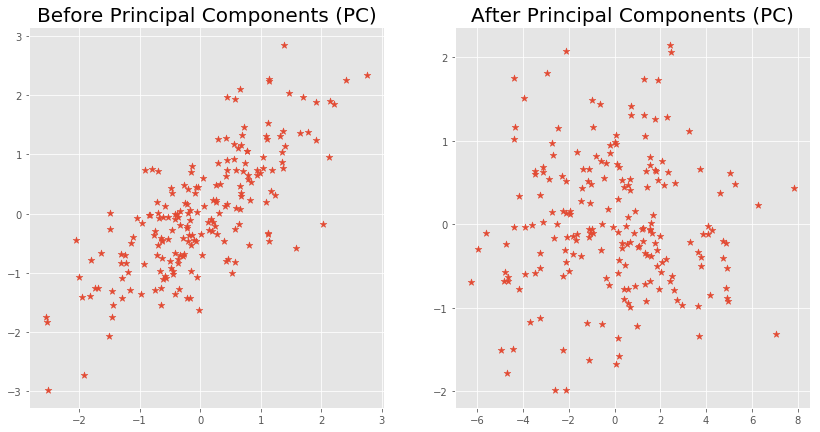

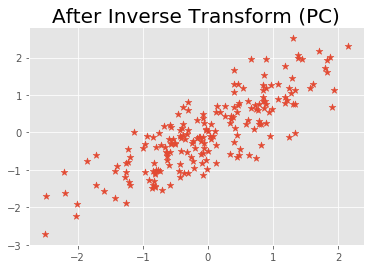

In [9]:
### Principal Component Plots:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(14,7))
 
 
rng = np.random.RandomState(5)
X = np.dot(rng.rand(10, 10), rng.randn(10, 200)).T
X_scaled= StandardScaler().fit_transform(X)
 
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0],  X_scaled[:, 1], marker='*', s=50)
plt.title("Before Principal Components (PC)", fontsize=20)
 
pca = PCA(n_components=4)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
 
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0],  X_pca[:, 1], marker='*', s=50)
plt.title("After Principal Components (PC)", fontsize=20)
plt.show()
 
X_new = pca.inverse_transform(X_pca)
plt.scatter(X_new[:, 0], X_new[:, 1], marker='*', s=50)
plt.title("After Inverse Transform (PC)", fontsize=20)
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


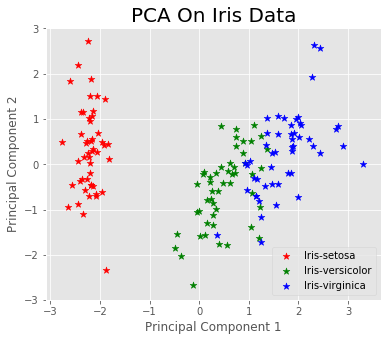

In [10]:
## Full Fleged PCA with Iris dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(6, 5))
 
df = pd.read_csv(filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None, sep=',')
df.columns=['sepal length', 'sepal width', 'petal length', 'petal width', 'species']
df.dropna(how="all", inplace=True) # drops the empty line at file-end
 
X = df.ix[:,0:4].values
y = df.ix[:,4].values
 
 
X_scaled = StandardScaler().fit_transform(X)
 
pca = PCA(n_components=2)
Y_fitted = pca.fit_transform(X_scaled)
 
 
for labels, columns in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),('red', 'green', 'blue')):
    plt.scatter(Y_fitted[y==labels, 0],Y_fitted[y==labels, 1],label=labels,c=columns,marker='*', s=50)
    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.title("PCA On Iris Data", fontsize=20)
plt.show()


#### Prerequisite for the PCA. 
* The data set used for Python is a cleaned version
* where missing values have been imputed and categorical variables are converted into numeric.


[ 92.46  97.76  99.48 100.  ]


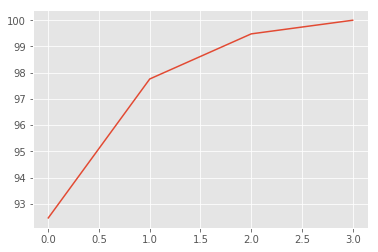

In [17]:
###. Now if I want to check how many PCA should I be looking into. Lets check that out
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

# Getting the dataset.
df = pd.read_csv(filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None, sep=',')
df.columns=['sepal length', 'sepal width', 'petal length', 'petal width', 'species']
df.dropna(how="all", inplace=True) # drops the empty line at file-end
 
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values
 
 
X_scaled = StandardScaler().fit_transform(X)
 
pca = PCA(n_components=4)      # for checking sake, checking the optimal PCA to consider

pca.fit(X)


#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print (var1)
plt.plot(var1)

In [ ]:
## by looking at the above graph we can clearly decide which PCA should we consider for our analysis.

In [23]:
# Explained Variance : The explained variance tells you how much information (variance) can be attributed to
### each of the principal components.   
pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

The images that you downloaded are contained in mnist.data and has a shape of (70000, 784) meaning there are 70,000 images with 784 dimensions (784 features).
The labels (the integers 0–9) are contained in mnist.target. The features are 784 dimensional (28 x 28 images) and the labels are simply numbers from 0–9.

[link for further reading the example](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)

### A Summary of the PCA Approach

* Standardize the data.
* Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix, or perform Singular Vector Decomposition.
* Sort eigenvalues in descending order and choose the k eigenvectors that correspond to the k largest eigenvalues where k is the number of dimensions of the new feature subspace (k≤d)/.
* Construct the projection matrix W from the selected k eigenvectors.
* Transform the original dataset X via W to obtain a k-dimensional feature subspace Y.

##### Concluding Remarks
The sheer size of data in the modern age is not only a challenge for computer hardware but also a main bottleneck for the performance of many machine learning algorithms.

*  The main goal of a PCA analysis is to identify patterns in data
* PCA aims to detect the correlation between variables
* If a strong correlation between variables exists, the attempt to reduce the dimensionality only makes sense.
*  In a nutshell, this is what PCA is all about :
    Finding the directions of maximum variance in high-dimensional data and project it onto a smaller dimensional subspace while retaining most of the information.
        

#### PCA Vs. LDA
* Both Linear Discriminant Analysis (LDA) and PCA are linear transformation methods
* PCA yields the directions (principal components) that maximize the variance of the data, whereas LDA also aims to find the directions that maximize the separation (or discrimination) between different classes, which can be useful in pattern classification problem (PCA "ignores" class labels).
* In other words, PCA projects the entire dataset onto a different feature (sub)space, and LDA tries to determine a suitable feature (sub)space in order to distinguish between patterns that belong to different classes.

In [ ]:

from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
 
df = load_iris()
X = df.data
y = df.target
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
 
rf_algorithm = RandomForestClassifier()
 
rf_algorithm.fit(X_train, y_train)
y_pred = rf_algorithm.predict(X_test)
print("Prediction\n\n",y_pred)
print("\n\nAccuracy Score\n\n",metrics.accuracy_score(y_test, y_pred))

In [26]:
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
 
df = load_iris()
X = df.data

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [42]:

rf_algorithm = RandomForestClassifier()

rf_algorithm.fit(X_train, y_train)
y_pred = rf_algorithm.predict(X_test)

In [39]:
y_pred

array([2, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 1, 1, 1])

In [40]:
y_test

array([2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 1])

In [41]:
print("\n\nAccuracy Score\n\n",metrics.accuracy_score(y_test, y_pred))



Accuracy Score

 0.9666666666666667


In [43]:
def calculate_accuracy(original, test):
    count_total = 0.0
    count_right = 0.0
    for i in range(len(original)):
        count_total += 1
        if original[i] == test[i]:
            count_right += 1
    return count_right / count_total

In [48]:
calculate_accuracy(y_pred, y_test)

0.95

In [ ]:
model.oob_score_ 